In [1]:
#데이터 구성
import pandas as pd

#행렬 연산
import numpy as np

#데이터 시각화
import matplotlib; import matplotlib.pyplot as plt

#데이터 시각화 산점도 행렬, 추세
import seaborn as sns

#scale 변환 평균 표준편차 기준
from sklearn.preprocessing import StandardScaler

#주성분 분석
from sklearn.decomposition import PCA

#회귀 분석
import statsmodels.api as sm

#폰트적용
matplotlib.rc('font', family="NanumBarunGothic")

In [2]:
df=pd.read_csv('//home/piai/바탕화면/df.csv',encoding='cp949')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517945 entries, 0 to 517944
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idUser          517945 non-null  object 
 1   idPOS           517945 non-null  object 
 2   SalesDate       517945 non-null  object 
 3   SalesDow        517945 non-null  object 
 4   SalesHour       517945 non-null  int64  
 5   ItemName        517945 non-null  object 
 6   Gender          517945 non-null  object 
 7   AgeGroup        517945 non-null  object 
 8   ItemNameMiddle  517945 non-null  object 
 9   Price           517945 non-null  int64  
 10  TempAvg         517945 non-null  float64
 11  TempMin         517945 non-null  float64
 12  TempMax         517945 non-null  float64
 13  hourRainfall    517945 non-null  float64
 14  RainfallAmount  517945 non-null  float64
 15  HumidAvg        517945 non-null  float64
 16  SnowloadMax     12115 non-null   float64
 17  ItemNameLa

In [4]:
df['SalesYearMonth']=df['SalesDate'].str[0:7]
df['SalesYearMonth']
df['SalesYear']=df['SalesDate'].str[0:4]
df['SalesYear']
df['SalesMonth']=df['SalesDate'].str[5:7]
df['SalesMonth']

0         01
1         01
2         01
3         01
4         01
          ..
517940    09
517941    09
517942    09
517943    09
517944    09
Name: SalesMonth, Length: 517945, dtype: object

In [5]:
df.head()

,idUser,idPOS,SalesDate,SalesDow,SalesHour,ItemName,Gender,AgeGroup,ItemNameMiddle,Price,...,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,ItemNameLarge,SalesYearMonth,SalesYear,SalesMonth
0,U100001,U100001-POS2020-10001,2020-01-01,수요일,10,CJ)고메모짜돈카츠450g,남성,40대,가공식사,10000,...,-6.5,0.3,9.83,0.1,64.4,0.0,식품,2020-01,2020,01
1,U100001,U100001-POS2020-10001,2020-01-01,수요일,10,롯)칠성사이다복숭아P500,남성,40대,음료,2200,...,-6.5,0.3,9.83,0.1,64.4,0.0,음료,2020-01,2020,01
2,U100001,U100001-POS2020-10001,2020-01-01,수요일,10,PSK)스윗사파이어포도400g,남성,40대,식재료,6800,...,-6.5,0.3,9.83,0.1,64.4,0.0,식품,2020-01,2020,01
3,U100001,U100001-POS2020-10004,2020-01-05,일요일,19,오뚜기)물엿700g,남성,40대,식재료,3000,...,-3.2,6.6,0.00,0.0,45.6,NaN,식품,2020-01,2020,01
4,U100001,U100001-POS2020-10004,2020-01-05,일요일,19,22del)헤이즐넛향1L,남성,40대,아이스링크,3500,...,-3.2,6.6,0.00,0.0,45.6,NaN,음료,2020-01,2020,01


In [69]:
pivot =pd.pivot_table(data=df, index=['SalesYearMonth'],columns=['Gender'],values=['Price'],aggfunc='count')
pivot


Price      
Gender             남성    여성
SalesYearMonth             
2020-01         10559  4417
2020-02          8112  3423
2020-03         12039  5020
2020-04         13298  5367
2020-05         15285  6198
2020-06         15891  6524
2020-07         16845  6934
2020-08         17624  7383
2020-09         17012  6887
2020-10         18471  7516
2020-11         15807  6529
2020-12         14019  5664
2021-01         11856  4634
2021-02          8693  3544
2021-03         13291  5616
2021-04         14618  6007
2021-05         16445  7261
2021-06         17281  7277
2021-07         19093  7812
2021-08         19220  7733
2021-09         18650  7982
2021-10         19503  8320
2021-11         17379  7424
2021-12         14862  6620

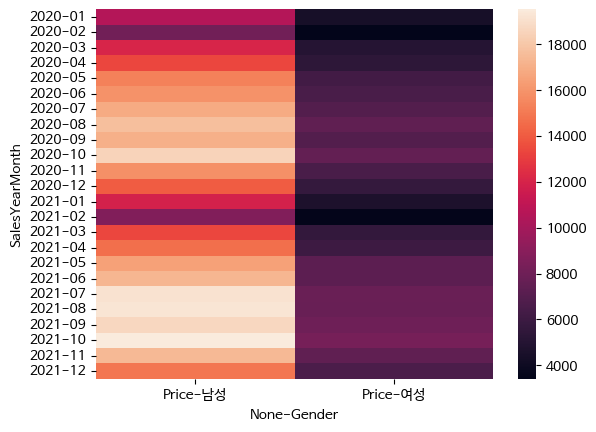

In [6]:
pivot =pd.pivot_table(data=df, index=['SalesYearMonth'],columns=['Gender'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

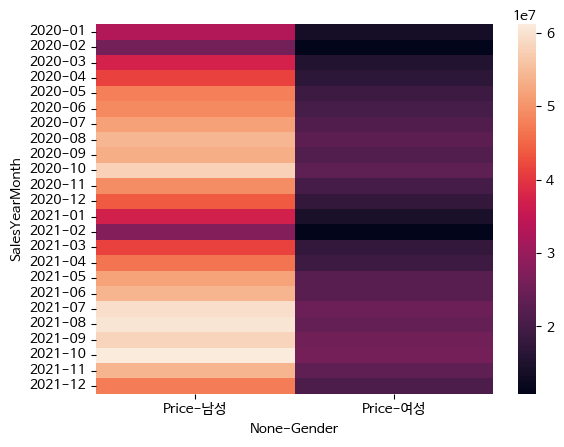

In [7]:
pivot =pd.pivot_table(data=df, index=['SalesYearMonth'],columns=['Gender'],values=['Price'],aggfunc='sum')
pivot
sns.heatmap(pivot)
plt.show()


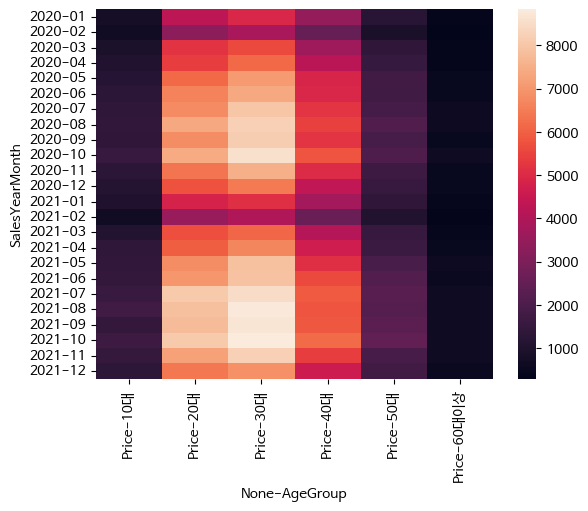

In [8]:
pivot =pd.pivot_table(data=df, index=['SalesYearMonth'],columns=['AgeGroup'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

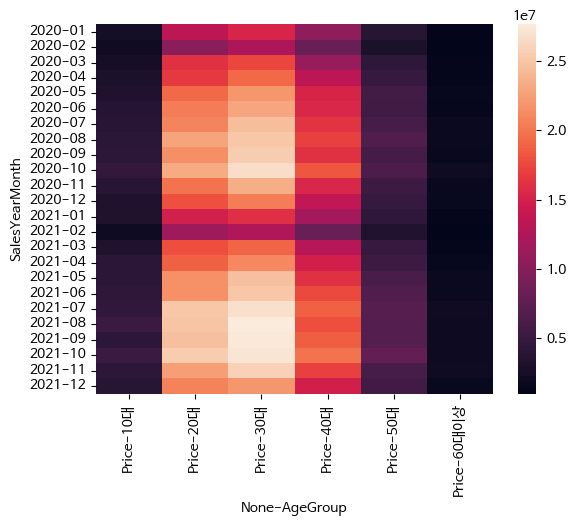

In [9]:
pivot =pd.pivot_table(data=df, index=['SalesYearMonth'],columns=['AgeGroup'],values=['Price'],aggfunc='sum')
pivot
sns.heatmap(pivot)
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517945 entries, 0 to 517944
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idUser          517945 non-null  object 
 1   idPOS           517945 non-null  object 
 2   SalesDate       517945 non-null  object 
 3   SalesDow        517945 non-null  object 
 4   SalesHour       517945 non-null  int64  
 5   ItemName        517945 non-null  object 
 6   Gender          517945 non-null  object 
 7   AgeGroup        517945 non-null  object 
 8   ItemNameMiddle  517945 non-null  object 
 9   Price           517945 non-null  int64  
 10  TempAvg         517945 non-null  float64
 11  TempMin         517945 non-null  float64
 12  TempMax         517945 non-null  float64
 13  hourRainfall    517945 non-null  float64
 14  RainfallAmount  517945 non-null  float64
 15  HumidAvg        517945 non-null  float64
 16  SnowloadMax     12115 non-null   float64
 17  ItemNameLa

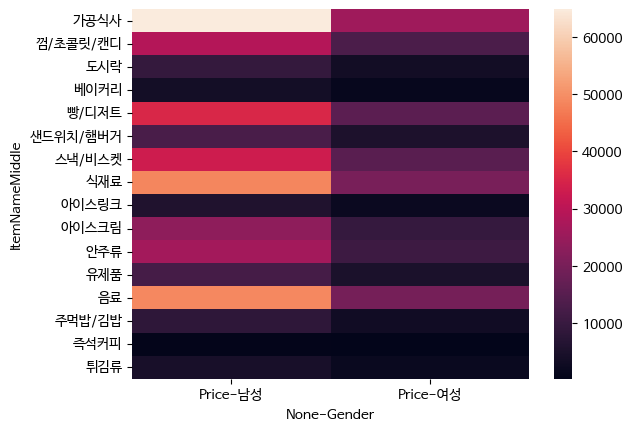

In [11]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['Gender'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

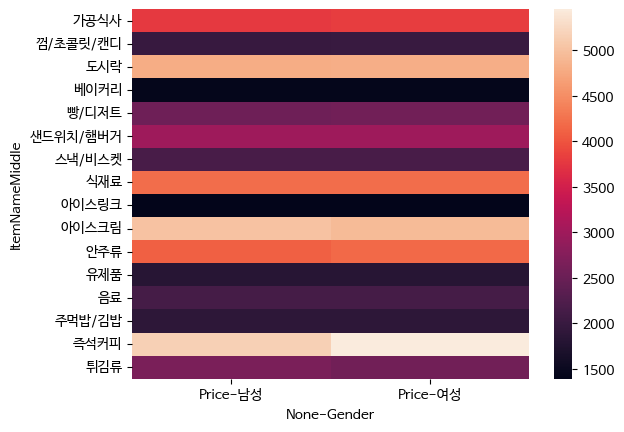

In [12]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['Gender'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

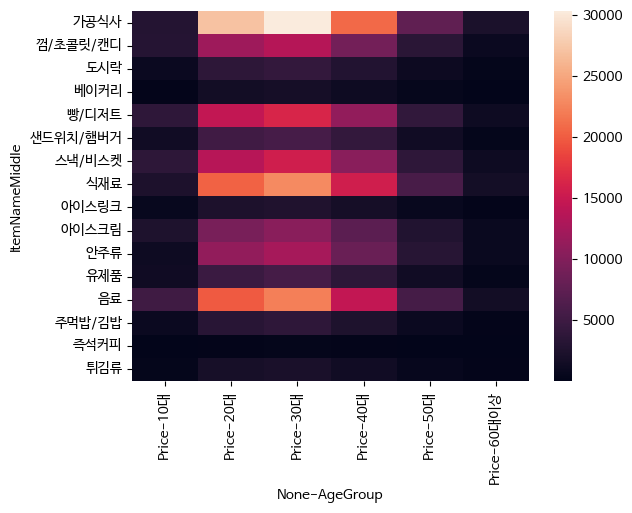

In [13]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['AgeGroup'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

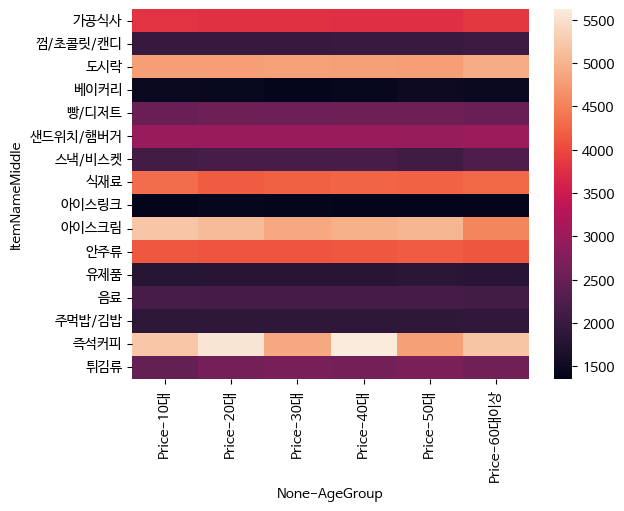

In [14]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['AgeGroup'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

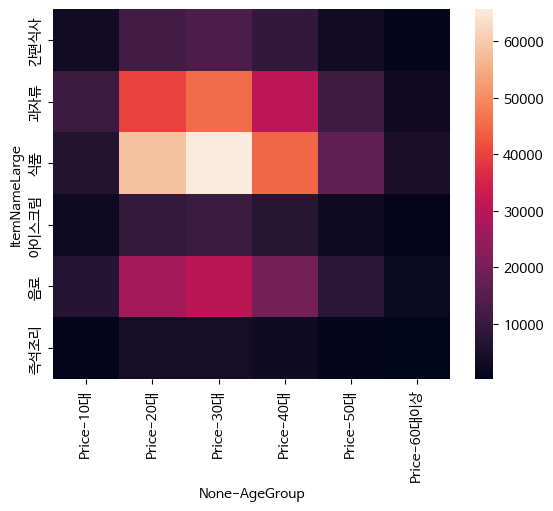

In [15]:
pivot =pd.pivot_table(data=df, index=['ItemNameLarge'],columns=['AgeGroup'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

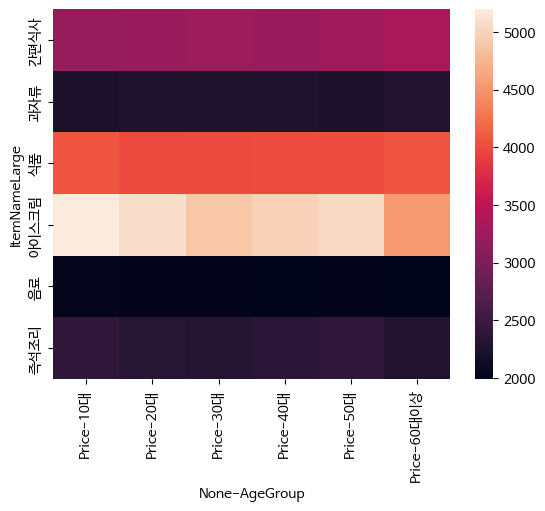

In [16]:
pivot =pd.pivot_table(data=df, index=['ItemNameLarge'],columns=['AgeGroup'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

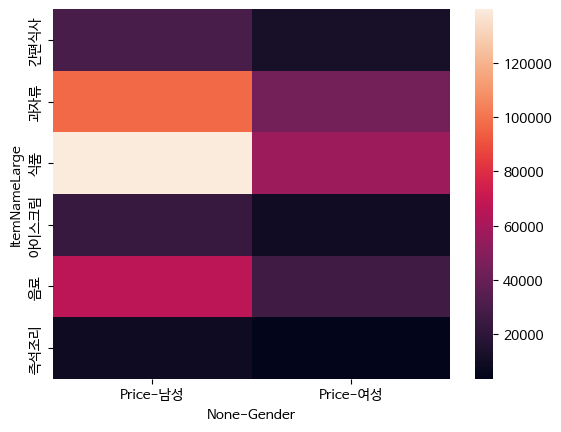

In [17]:
pivot =pd.pivot_table(data=df, index=['ItemNameLarge'],columns=['Gender'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

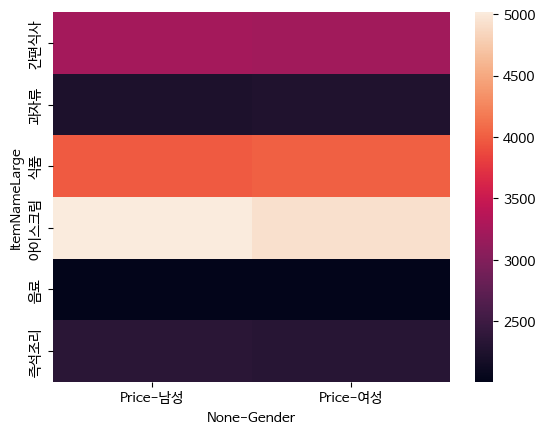

In [18]:
pivot =pd.pivot_table(data=df, index=['ItemNameLarge'],columns=['Gender'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

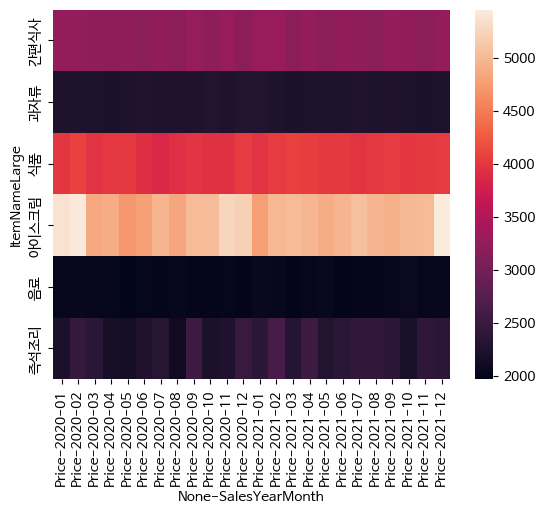

In [19]:
pivot =pd.pivot_table(data=df, index=['ItemNameLarge'],columns=['SalesYearMonth'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

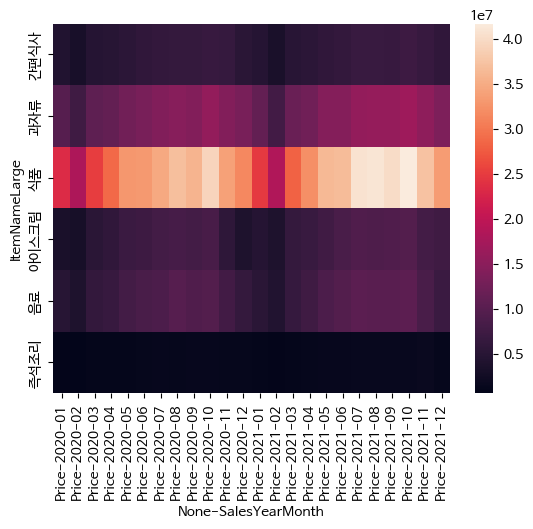

In [20]:
pivot =pd.pivot_table(data=df, index=['ItemNameLarge'],columns=['SalesYearMonth'],values=['Price'],aggfunc='sum')
pivot
sns.heatmap(pivot)
plt.show()

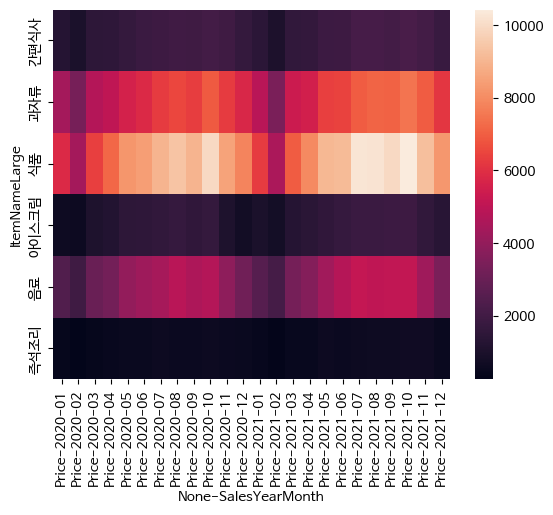

In [21]:
pivot =pd.pivot_table(data=df, index=['ItemNameLarge'],columns=['SalesYearMonth'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

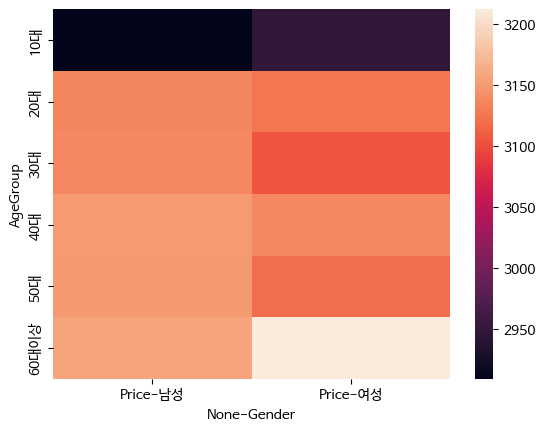

In [22]:
pivot =pd.pivot_table(data=df, index=['AgeGroup'],columns=['Gender'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

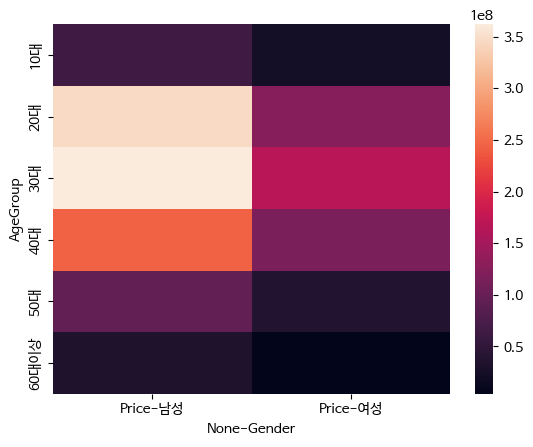

In [23]:
pivot =pd.pivot_table(data=df, index=['AgeGroup'],columns=['Gender'],values=['Price'],aggfunc='sum')
pivot
sns.heatmap(pivot)
plt.show()

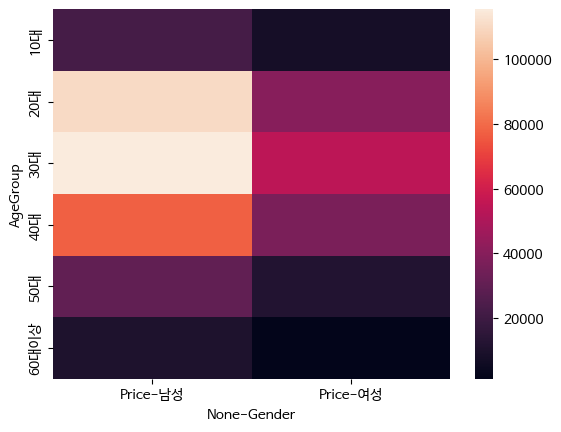

In [24]:
pivot =pd.pivot_table(data=df, index=['AgeGroup'],columns=['Gender'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

In [25]:
df.head()

,idUser,idPOS,SalesDate,SalesDow,SalesHour,ItemName,Gender,AgeGroup,ItemNameMiddle,Price,...,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,ItemNameLarge,SalesYearMonth,SalesYear,SalesMonth
0,U100001,U100001-POS2020-10001,2020-01-01,수요일,10,CJ)고메모짜돈카츠450g,남성,40대,가공식사,10000,...,-6.5,0.3,9.83,0.1,64.4,0.0,식품,2020-01,2020,01
1,U100001,U100001-POS2020-10001,2020-01-01,수요일,10,롯)칠성사이다복숭아P500,남성,40대,음료,2200,...,-6.5,0.3,9.83,0.1,64.4,0.0,음료,2020-01,2020,01
2,U100001,U100001-POS2020-10001,2020-01-01,수요일,10,PSK)스윗사파이어포도400g,남성,40대,식재료,6800,...,-6.5,0.3,9.83,0.1,64.4,0.0,식품,2020-01,2020,01
3,U100001,U100001-POS2020-10004,2020-01-05,일요일,19,오뚜기)물엿700g,남성,40대,식재료,3000,...,-3.2,6.6,0.00,0.0,45.6,NaN,식품,2020-01,2020,01
4,U100001,U100001-POS2020-10004,2020-01-05,일요일,19,22del)헤이즐넛향1L,남성,40대,아이스링크,3500,...,-3.2,6.6,0.00,0.0,45.6,NaN,음료,2020-01,2020,01


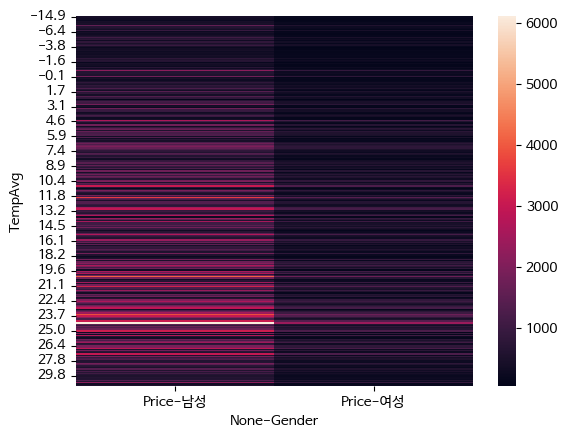

In [26]:
pivot =pd.pivot_table(data=df, index=['TempAvg'],columns=['Gender'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

In [27]:
# 습도분리
def Humidity(x):
        if  25>x: return '0'
        elif x >= 25 and x <30: return '1'  
        elif x >= 30 and x <60: return '2'
        elif x >= 60 and x <70: return '3' 
        else: return '4'
df['습도상태']=df['HumidAvg'].apply(Humidity)
df["습도상태"]

# 강수량 분리
def RainfallAmount(x):
        if  1>x: return '0'
        elif x >= 1 and x <3: return '1'  
        elif x >= 3 and x <15: return '2'
        elif x >= 15 and x <30: return '3' 
        else: return '4'
df['강수상태']=df['RainfallAmount'].apply(RainfallAmount)
df['강수상태']

0         0
1         0
2         0
3         0
4         0
         ..
517940    0
517941    0
517942    0
517943    0
517944    0
Name: 강수상태, Length: 517945, dtype: object

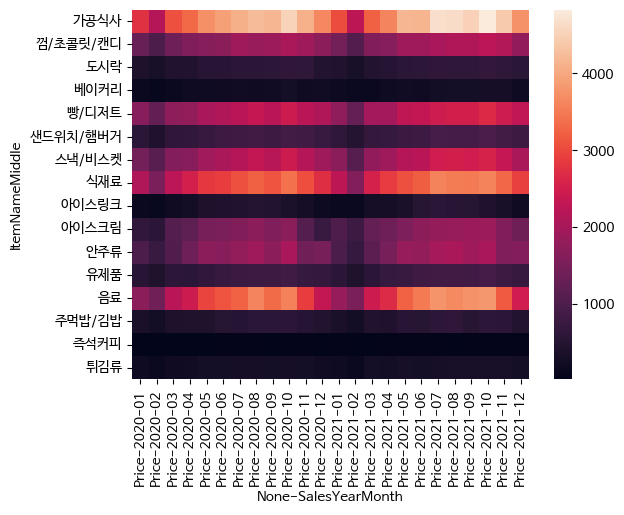

In [28]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['SalesYearMonth'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

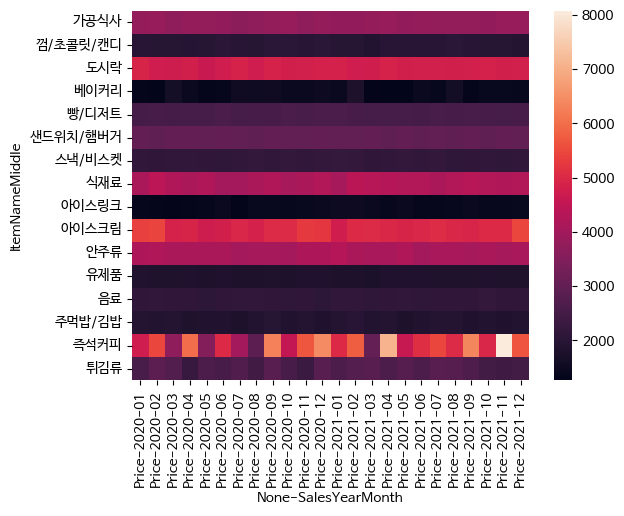

In [29]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['SalesYearMonth'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

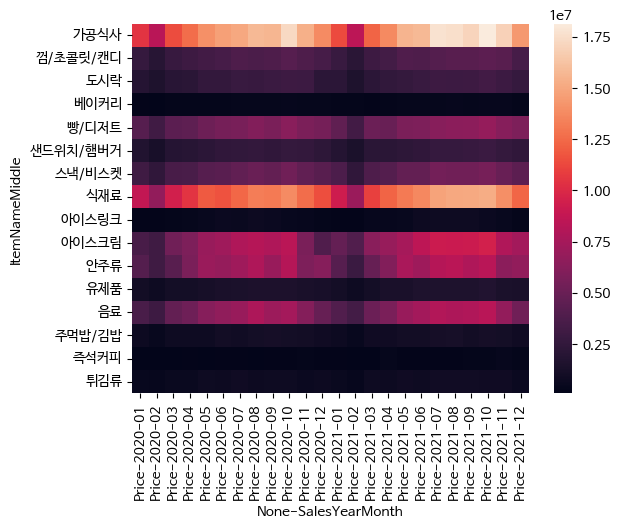

In [30]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['SalesYearMonth'],values=['Price'],aggfunc='sum')
pivot
sns.heatmap(pivot)
plt.show()

In [31]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['AgeGroup'],values=['Price'],aggfunc='mean')
pivot

Price                                         \
AgeGroup                10대          20대          30대          40대   
ItemNameMiddle                                                       
가공식사            3802.546880  3780.018844  3789.023263  3770.567171   
껌/초콜릿/캔디        1981.890402  1989.108040  1977.770846  1993.372558   
도시락             4784.865471  4787.496542  4810.484669  4791.870215   
베이커리            1467.843137  1452.211221  1396.928529  1432.522523   
빵/디저트           2519.556157  2556.599876  2563.943082  2544.550374   
샌드위치/햄버거        2990.455840  2974.727202  2998.230402  2986.095471   
스낵/비스켓          2118.392409  2153.754017  2167.192814  2168.799617   
식재료             4321.886549  4170.354791  4195.415702  4233.975633   
아이스링크           1379.806139  1419.932575  1394.903200  1365.480427   
아이스크림           5197.780468  5088.305157  4888.871966  4973.394623   
안주류             4130.476190  4095.650605  4103.792910  4126.917476   
유제품             1797.902834  1809.394453  1816.598198  1815.367075   
음료              2161.905701  2127.029753  2136.637447  2124.906704   
주먹밥/김밥          1870.270270  1877.192982  1878.368121  1881.095552   
즉석커피            5210.958904  5554.508197  4877.170418  5621.287129   
튀김류             2468.902439  2610.851064  2659.769563  2624.162509   

                                          
AgeGroup                50대        60대이상  
ItemNameMiddle                            
가공식사            3766.507915  3856.272894  
껌/초콜릿/캔디        1992.369598  2056.161972  
도시락             4778.694818  4936.601307  
베이커리            1503.791469  1492.086331  
빵/디저트           2555.150301  2499.628959  
샌드위치/햄버거        2973.426573  3008.011050  
스낵/비스켓          2089.282858  2227.423581  
식재료             4206.273896  4278.205282  
아이스링크           1381.402439  1358.928571  
아이스크림           5037.732978  4542.225201  
안주류             4160.228354  4118.928571  
유제품             1832.524964  1811.178082  
음료              2131.456169  2110.646259  
주먹밥/김밥          1887.690504  1919.841270  
즉석커피            4792.045455  5176.190476  
튀김류             2698.282443  2585.534591

In [32]:
df[df['ItemNameMiddle']=='즉석커피']

,idUser,idPOS,SalesDate,SalesDow,SalesHour,ItemName,Gender,AgeGroup,ItemNameMiddle,Price,...,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,ItemNameLarge,SalesYearMonth,SalesYear,SalesMonth,습도상태,강수상태
1320,U100832,U100832-POS2021-10269,2021-06-07,월요일,14,GET허쉬초코카페모카30g,남성,40대,즉석커피,600,...,3.58,0.0,71.5,NaN,즉석조리,2021-06,2021,06,4,0
2004,U100834,U100834-POS2020-10169,2020-09-19,토요일,18,GET커피다크블렌드500g,남성,50대,즉석커피,17000,...,1.00,0.3,59.3,NaN,즉석조리,2020-09,2020,09,2,0
2137,U100834,U100834-POS2021-10062,2021-03-30,화요일,12,GET즉석카페라떼파우더,남성,50대,즉석커피,300,...,0.00,0.0,47.3,NaN,즉석조리,2021-03,2021,03,2,0
2161,U100834,U100834-POS2021-10081,2021-04-20,화요일,20,GET커피다크블렌드500g,남성,50대,즉석커피,17000,...,0.00,0.0,55.1,NaN,즉석조리,2021-04,2021,04,2,0
3048,U100835,U100835-POS2020-10677,2020-10-16,금요일,0,GET즉석카페라떼파우더,남성,30대,즉석커피,300,...,0.00,0.0,64.3,NaN,즉석조리,2020-10,2020,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517237,U100831,U100831-POS2020-10141,2020-04-30,목요일,9,GET커피블렌딩원두500g,남성,30대,즉석커피,17000,...,0.00,0.0,57.1,NaN,즉석조리,2020-04,2020,04,2,0
517248,U100831,U100831-POS2020-10146,2020-05-04,월요일,17,GET즉석바닐라라떼30g,남성,30대,즉석커피,500,...,0.00,0.0,63.9,NaN,즉석조리,2020-05,2020,05,3,0
517619,U100831,U100831-POS2021-10005,2021-01-29,금요일,11,GET토피넛라떼파우더,남성,30대,즉석커피,500,...,0.00,0.0,40.0,NaN,즉석조리,2021-01,2021,01,2,0
517814,U100831,U100831-POS2021-10202,2021-06-26,토요일,12,GET허쉬초코카페모카30g,남성,30대,즉석커피,600,...,11.42,4.5,78.5,NaN,즉석조리,2021-06,2021,06,4,2


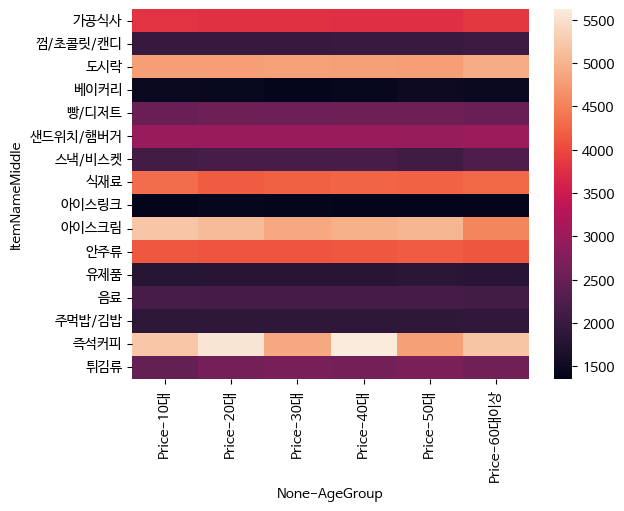

In [33]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['AgeGroup'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

In [34]:
pd.crosstab(df['ItemNameMiddle'],df['AgeGroup'],df['Price'],aggfunc='count').style.background_gradient()

AgeGroup,10대,20대,30대,40대,50대,60대이상
ItemNameMiddle,,,,,,
가공식사,2933,27065,30305,20805,7517,2184
껌/초콜릿/캔디,3084,11940,13624,9008,3355,852
도시락,892,3615,4044,2743,1042,306
베이커리,255,1515,1693,1110,422,139
빵/디저트,3695,14473,16269,11087,3992,1105
샌드위치/햄버거,1404,5132,5651,4085,1430,362
스낵/비스켓,3583,13692,15585,10455,3751,1145
식재료,2327,20350,22889,15595,5754,1666
아이스링크,619,2373,2531,1686,656,168


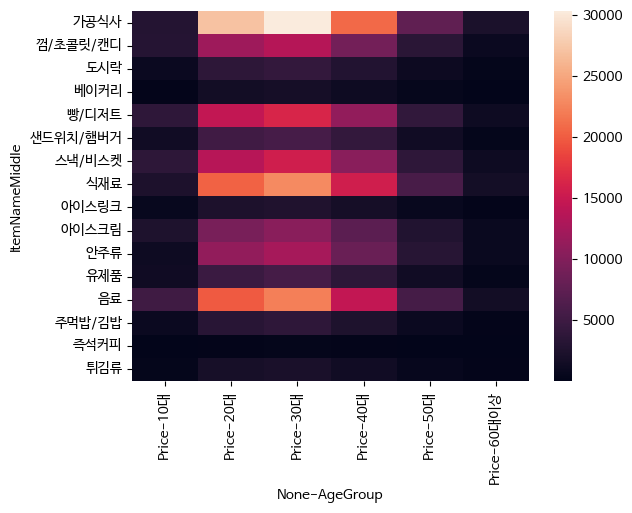

In [35]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['AgeGroup'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

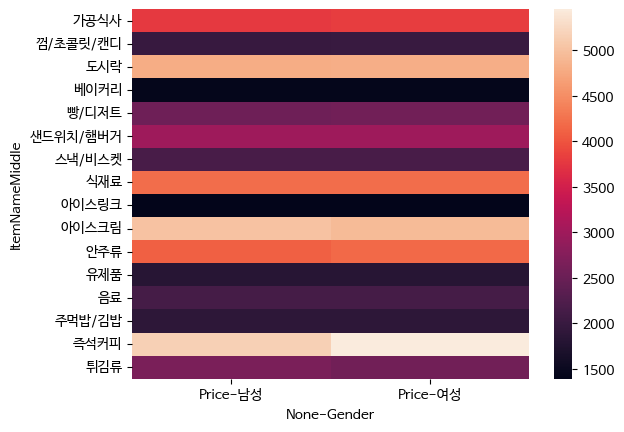

In [36]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['Gender'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

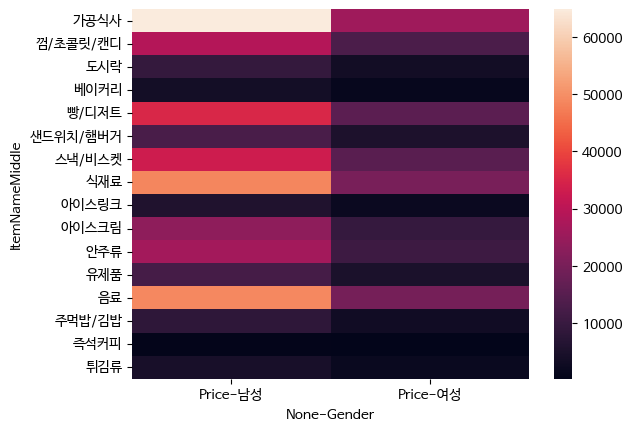

In [37]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['Gender'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

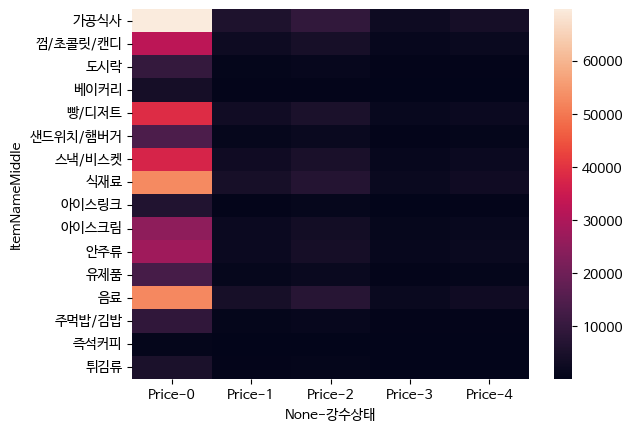

In [38]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['강수상태'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

In [40]:
#계절별 매출 변화
def Season(x):
        if  3<=x and x<=5 : return "봄"
        elif x >= 6 and x <=8: return '여름'
        elif x >= 9 and x <=11: return "가을"
        else: return "겨울"
df["계절"]=df["SalesDate"].str[5:7].astype("int").apply(Season)

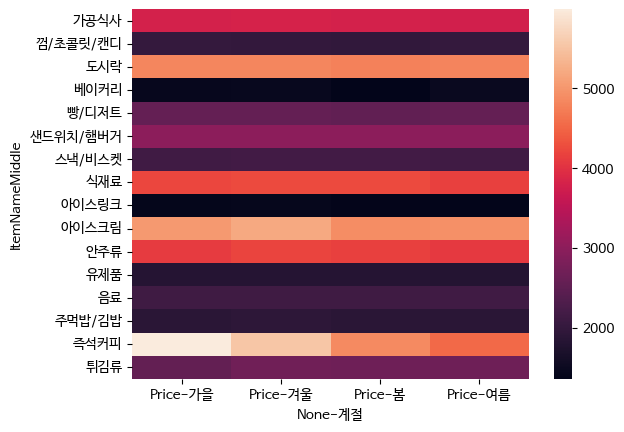

In [41]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['계절'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

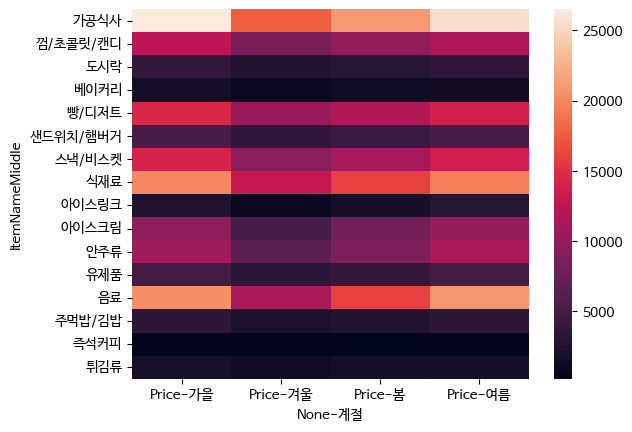

In [42]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['계절'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

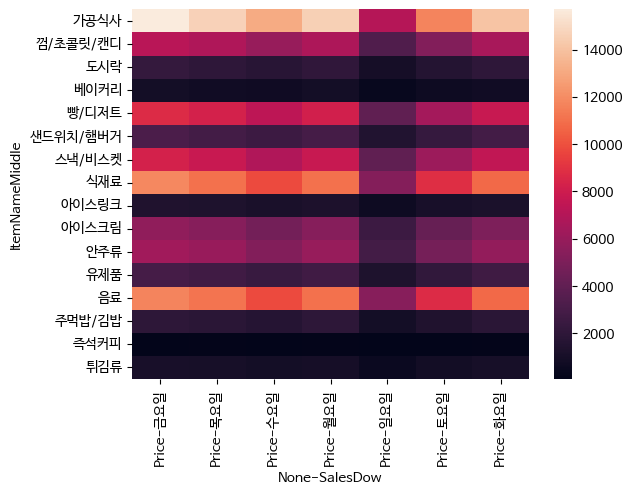

In [43]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['SalesDow'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

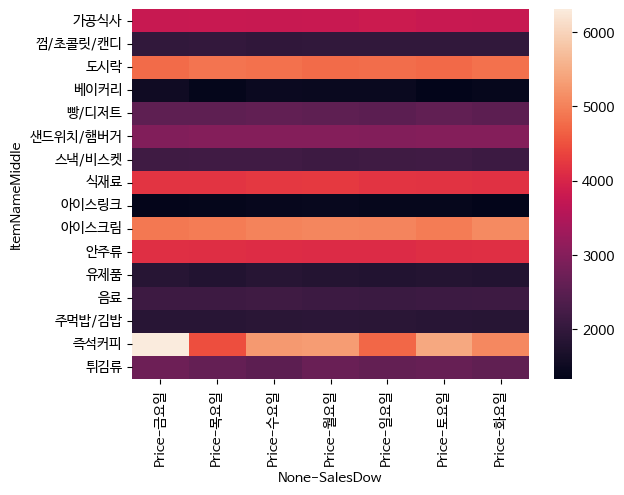

In [44]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['SalesDow'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

In [45]:
df.head()

,idUser,idPOS,SalesDate,SalesDow,SalesHour,ItemName,Gender,AgeGroup,ItemNameMiddle,Price,...,RainfallAmount,HumidAvg,SnowloadMax,ItemNameLarge,SalesYearMonth,SalesYear,SalesMonth,습도상태,강수상태,계절
0,U100001,U100001-POS2020-10001,2020-01-01,수요일,10,CJ)고메모짜돈카츠450g,남성,40대,가공식사,10000,...,0.1,64.4,0.0,식품,2020-01,2020,01,3,0,겨울
1,U100001,U100001-POS2020-10001,2020-01-01,수요일,10,롯)칠성사이다복숭아P500,남성,40대,음료,2200,...,0.1,64.4,0.0,음료,2020-01,2020,01,3,0,겨울
2,U100001,U100001-POS2020-10001,2020-01-01,수요일,10,PSK)스윗사파이어포도400g,남성,40대,식재료,6800,...,0.1,64.4,0.0,식품,2020-01,2020,01,3,0,겨울
3,U100001,U100001-POS2020-10004,2020-01-05,일요일,19,오뚜기)물엿700g,남성,40대,식재료,3000,...,0.0,45.6,NaN,식품,2020-01,2020,01,2,0,겨울
4,U100001,U100001-POS2020-10004,2020-01-05,일요일,19,22del)헤이즐넛향1L,남성,40대,아이스링크,3500,...,0.0,45.6,NaN,음료,2020-01,2020,01,2,0,겨울


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517945 entries, 0 to 517944
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idUser          517945 non-null  object 
 1   idPOS           517945 non-null  object 
 2   SalesDate       517945 non-null  object 
 3   SalesDow        517945 non-null  object 
 4   SalesHour       517945 non-null  int64  
 5   ItemName        517945 non-null  object 
 6   Gender          517945 non-null  object 
 7   AgeGroup        517945 non-null  object 
 8   ItemNameMiddle  517945 non-null  object 
 9   Price           517945 non-null  int64  
 10  TempAvg         517945 non-null  float64
 11  TempMin         517945 non-null  float64
 12  TempMax         517945 non-null  float64
 13  hourRainfall    517945 non-null  float64
 14  RainfallAmount  517945 non-null  float64
 15  HumidAvg        517945 non-null  float64
 16  SnowloadMax     12115 non-null   float64
 17  ItemNameLa

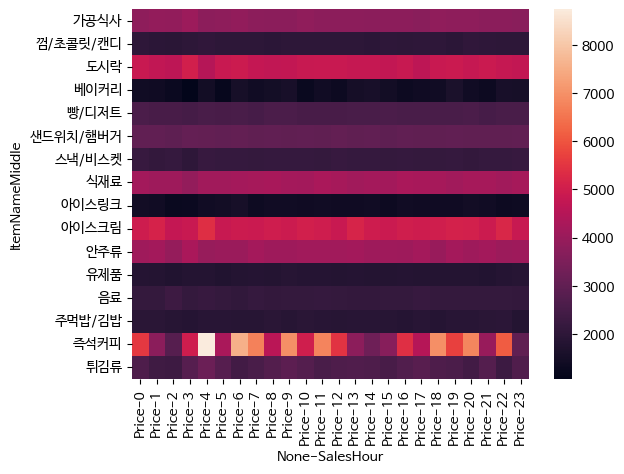

In [47]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['SalesHour'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

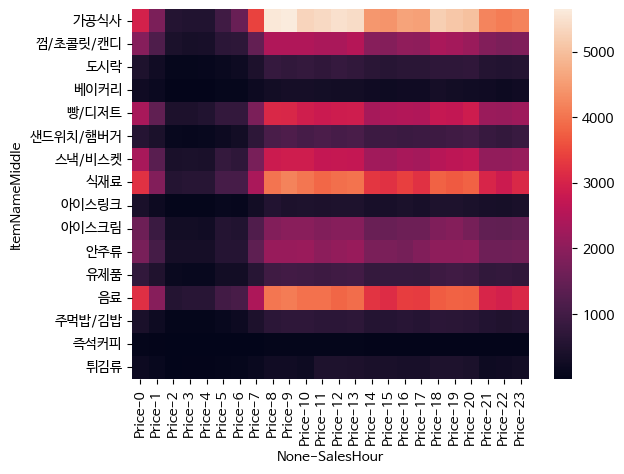

In [48]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['SalesHour'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

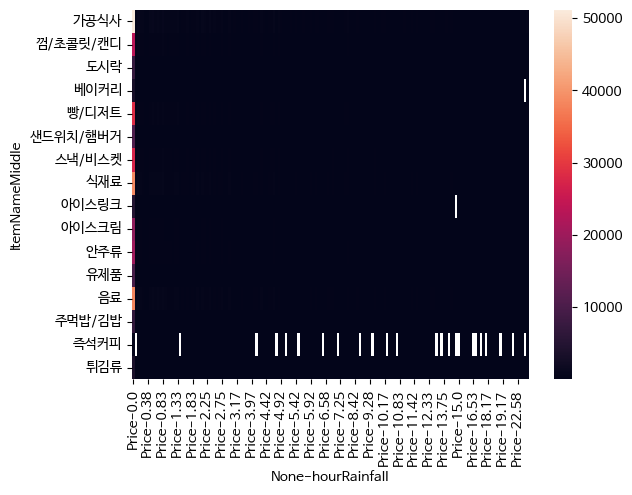

In [160]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['hourRainfall'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

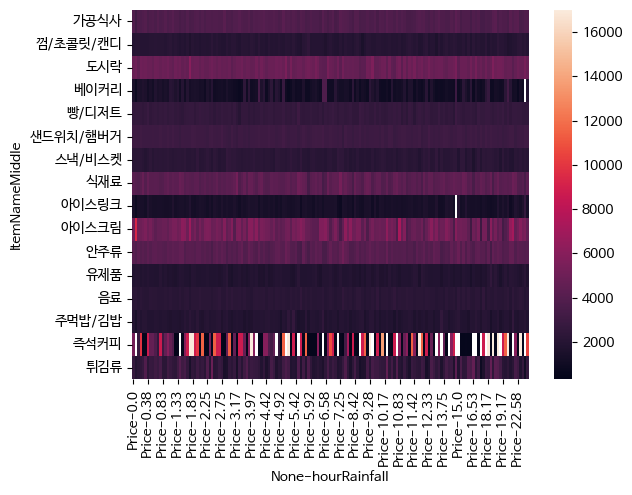

In [50]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['hourRainfall'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

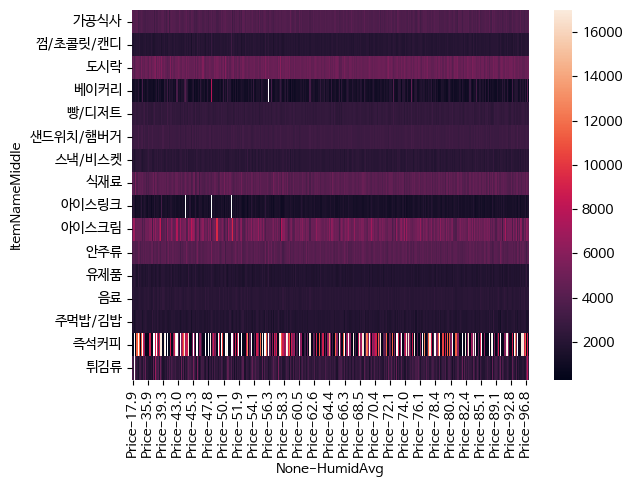

In [51]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['HumidAvg'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

In [ ]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['TempMin'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

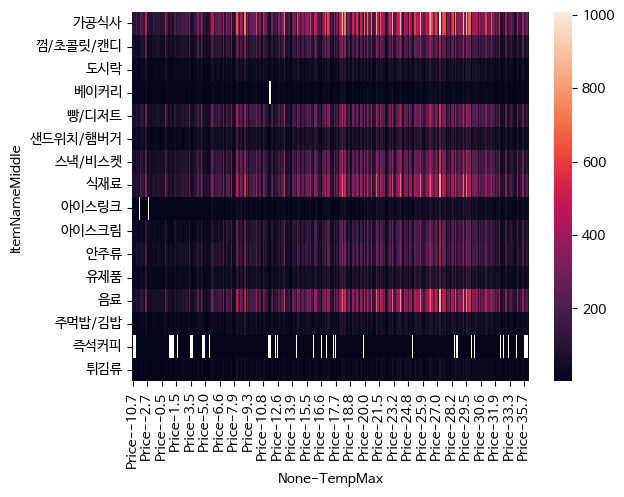

In [53]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['TempMax'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

## 지우기 귀찮아서 냅둠 일단 안쓴다고 하는데 혹시 모르니 보류

In [198]:
df

,idUser,idPOS,SalesDate,SalesDow,SalesHour,ItemName,Gender,AgeGroup,ItemNameMiddle,Price,...,RainfallAmount,HumidAvg,SnowloadMax,ItemNameLarge,SalesYearMonth,SalesYear,SalesMonth,습도상태,강수상태,계절
0,U100001,U100001-POS2020-10001,2020-01-01,수요일,10,CJ)고메모짜돈카츠450g,남성,40대,가공식사,10000,...,0.1,64.4,0.0,식품,2020-01,2020,01,3,0,겨울
1,U100001,U100001-POS2020-10001,2020-01-01,수요일,10,롯)칠성사이다복숭아P500,남성,40대,음료,2200,...,0.1,64.4,0.0,음료,2020-01,2020,01,3,0,겨울
2,U100001,U100001-POS2020-10001,2020-01-01,수요일,10,PSK)스윗사파이어포도400g,남성,40대,식재료,6800,...,0.1,64.4,0.0,식품,2020-01,2020,01,3,0,겨울
3,U100001,U100001-POS2020-10004,2020-01-05,일요일,19,오뚜기)물엿700g,남성,40대,식재료,3000,...,0.0,45.6,NaN,식품,2020-01,2020,01,2,0,겨울
4,U100001,U100001-POS2020-10004,2020-01-05,일요일,19,22del)헤이즐넛향1L,남성,40대,아이스링크,3500,...,0.0,45.6,NaN,음료,2020-01,2020,01,2,0,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517940,U100831,U100831-POS2021-10299,2021-09-10,금요일,15,현대)갈릭페스츄리오징어,남성,30대,안주류,3000,...,0.0,76.0,NaN,식품,2021-09,2021,09,4,0,가을
517941,U100831,U100831-POS2021-10299,2021-09-10,금요일,15,길림)와사비맛아몬드40g,남성,30대,안주류,2000,...,0.0,76.0,NaN,식품,2021-09,2021,09,4,0,가을
517942,U100831,U100831-POS2021-10299,2021-09-10,금요일,15,신)고구마치아바타피자,남성,30대,가공식사,3400,...,0.0,76.0,NaN,식품,2021-09,2021,09,4,0,가을
517943,U100831,U100831-POS2021-10302,2021-09-12,일요일,9,CJ)오곡참깨드레싱105g,남성,30대,식재료,1600,...,0.0,64.6,NaN,식품,2021-09,2021,09,3,0,가을


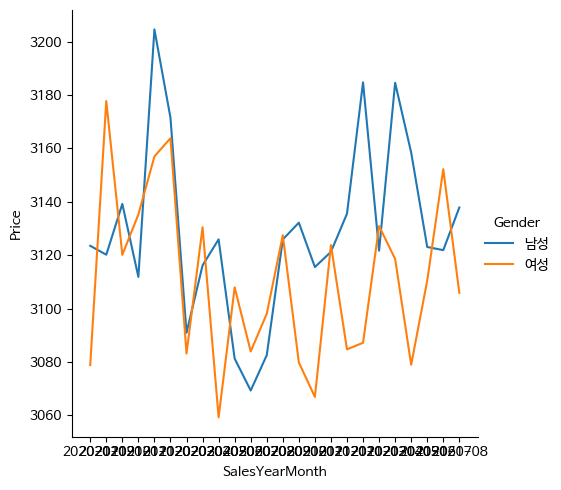

In [197]:
sns.relplot(x='SalesYearMonth',y='Price',hue='Gender',data=df, kind='line',ci=None)
plt.show()

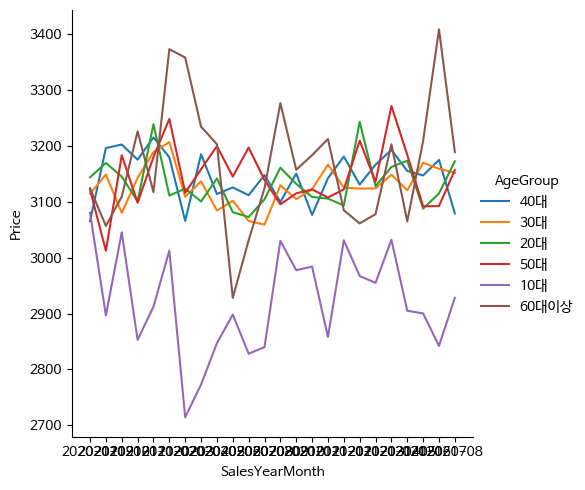

In [55]:
sns.relplot(x='SalesYearMonth',y='Price',hue='AgeGroup',data=df, kind='line',ci=None)
plt.show()

In [56]:
pivot =pd.pivot_table(data=df, index=['SalesYearMonth'], values='ItemNameMiddle', aggfunc='count').reset_index()
pivot.set_index('SalesYearMonth')

,ItemNameMiddle
SalesYearMonth,
2020-01,14976
2020-02,11535
2020-03,17059
2020-04,18665
2020-05,21483
2020-06,22415
2020-07,23779
2020-08,25007
2020-09,23899


In [ ]:
sns.relplot(x='SalesYearMonth',y='ItemNameMiddle',data=pivot, kind='line')
plt.show()

In [ ]:
list(df.columns)

In [ ]:
a=pd.crosstab(df['ItemNameMiddle'],df['AgeGroup'],df['Price'],aggfunc='count').style.background_gradient()
print(a)


In [ ]:
columns=list(df.columns)

In [ ]:
columns=[
 'ItemName',
 'Gender',
 'AgeGroup',
 'ItemNameMiddle',]

In [ ]:
posco=['mean','sum','count']

In [ ]:
for i in range(len(columns)):
    for j in range(len(posco)):
        pd.crosstab(df['ItemNameMiddle'],df[columns[i]],df['Price'],aggfunc=posco[j]).style.background_gradient()


In [ ]:
for i in range(len(columns)):
    for j in range(len(posco)):
        pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=[columns[i]],values=['Price'],aggfunc=posco[j])
        pivot
        sns.heatmap(pivot)
        plt.show()

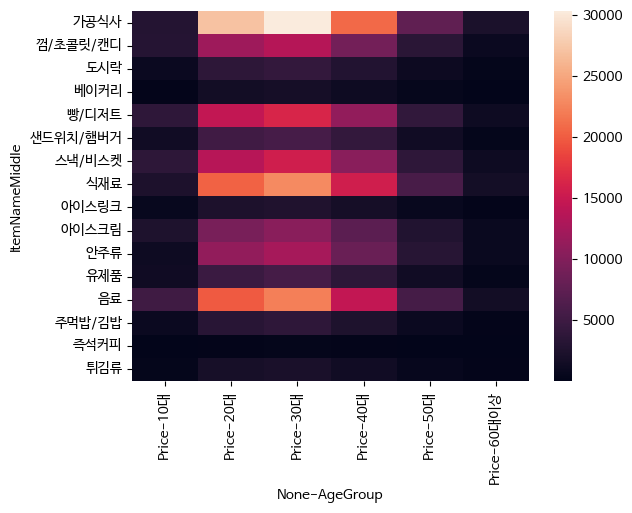

In [57]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['AgeGroup'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

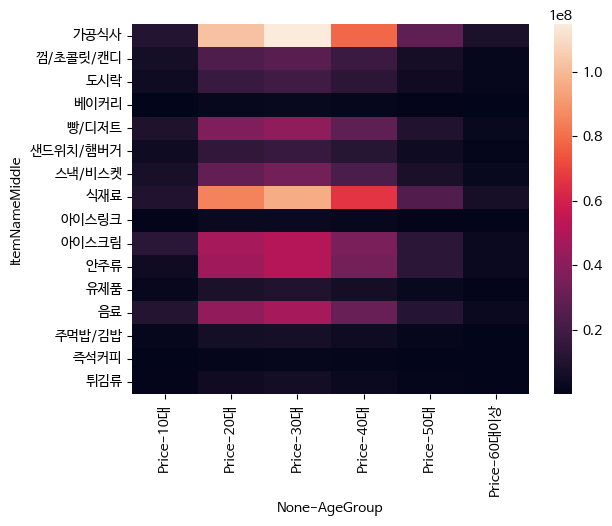

In [58]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['AgeGroup'],values=['Price'],aggfunc='sum')
pivot
sns.heatmap(pivot)
plt.show()

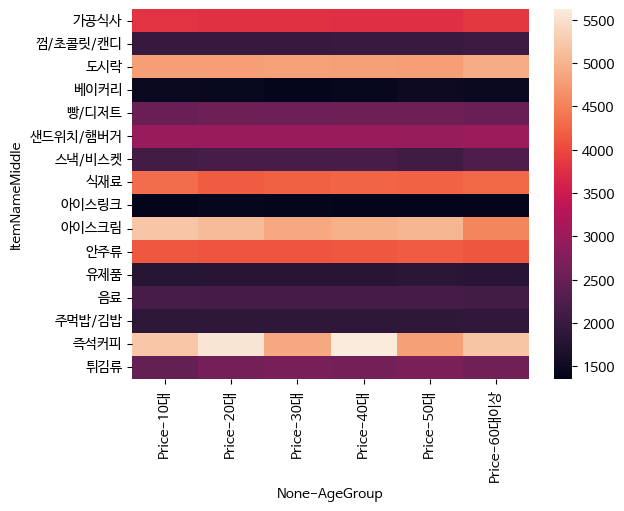

In [59]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['AgeGroup'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

In [70]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['SalesYearMonth'],values=['Price'],aggfunc='sum')
pivot

Price                                                   \
SalesYearMonth   2020-01  2020-02   2020-03   2020-04   2020-05   2020-06   
ItemNameMiddle                                                              
가공식사            10483510  8317390  11435750  12624300  14039290  14661940   
껌/초콜릿/캔디         2634750  1946400   2722850   3039650   3247850   3446950   
도시락              1868700  1532300   2050100   2132300   2494700   2510100   
베이커리              209300   130700    261800    280000    272400    282600   
빵/디저트            4160670  3178370   4365760   4514460   5115070   5518840   
샌드위치/햄버거         1675000  1248400   1897300   1956400   2147100   2394500   
스낵/비스켓           3085100  2371700   3535200   3619800   4139400   4286200   
식재료              8715290  6682020   9455390  10474460  11874110  11597390   
아이스링크             209900   167600    278900    349700    516400    598100   
아이스크림            3497400  3122100   5249400   5833900   6937800   7278600   
안주류              4108900  3115700   4187800   5725600   7020500   6860100   
유제품              1006070   751940   1077270   1034380   1173840   1334740   
음료               3611950  3014650   4733900   5184700   6162200   6609900   
주먹밥/김밥            668200   482500    743900    735400    770000    963500   
즉석커피              127700   109000    111600    197200     95300    200600   
튀김류               518000   386200    582500    537800    735200    696200   

                                                        ...            \
SalesYearMonth   2020-07   2020-08   2020-09   2020-10  ...   2021-03   
ItemNameMiddle                                          ...             
가공식사            15023800  15793180  15661830  17300670  ...  12280790   
껌/초콜릿/캔디         3799550   3663550   3818550   4181250  ...   2995350   
도시락              2822500   2738100   2854200   3016300  ...   2195400   
베이커리              363000    339100    359100    392400  ...    215800   
빵/디저트            5605160   6029860   5727170   6322950  ...   5043940   
샌드위치/햄버거         2440600   2524000   2355300   2607200  ...   2074000   
스낵/비스켓           4675400   5027400   4690400   5284000  ...   3800100   
식재료             12435770  13252280  13126600  13782220  ...  11021800   
아이스링크             566400    666500    646400    517900  ...    412300   
아이스크림            7880400   8185900   7853800   8409800  ...   6348800   
안주류              7229900   7877700   6965800   8174300  ...   4861100   
유제품              1370810   1437520   1457040   1494920  ...   1019640   
음료               6972350   7783400   7090250   7490350  ...   5099500   
주먹밥/김밥            905900   1042100   1096400   1063000  ...    842100   
즉석커피              188500    139100    232300    203200  ...     97500   
튀김류               806200    699600    781700    761900  ...    765300   

                                                                            \
SalesYearMonth   2021-04   2021-05   2021-06   2021-07   2021-08   2021-09   
ItemNameMiddle                                                               
가공식사            13763430  15587390  15771230  17672340  17537060  17059450   
껌/초콜릿/캔디         3294400   3857500   3811300   4060400   4217150   4209200   
도시락              2433800   2632200   2825900   3024200   2929700   2986900   
베이커리              240400    308200    318000    347000    442600    353600   
빵/디저트            4948370   5749340   5821250   6298410   6417000   6465050   
샌드위치/햄버거         2074700   2279600   2380600   2691700   2649200   2718400   
스낵/비스켓           4108700   4706300   4749100   5390000   5265300   5260800   
식재료             12288320  13121680  13695150  14790440  14982240  15086610   
아이스링크             393100    496600    694000    765200    748800    733100   
아이스크림            6874300   7564900   8539800   9138900   9067100   9179800   
안주류              6043800   7658000   7214400   8193200   8414600   7868000   
유제품              1297460   1345370   1507280   1558980   1528670   1520570 

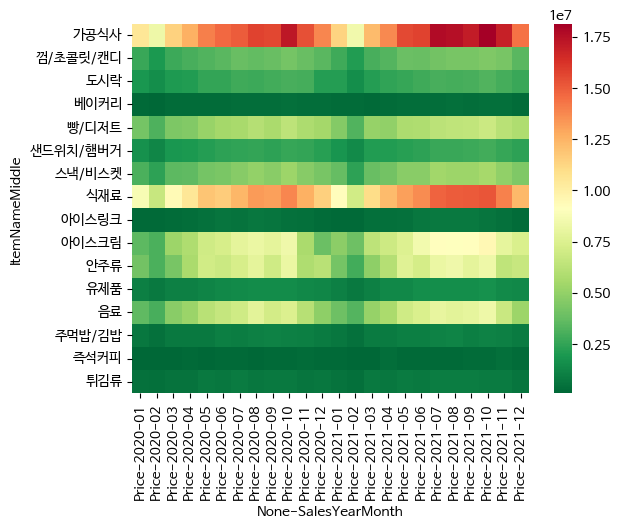

In [67]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['SalesYearMonth'],values=['Price'],aggfunc='sum')
pivot
sns.heatmap(pivot,cmap='RdYlGn_r')
plt.show()

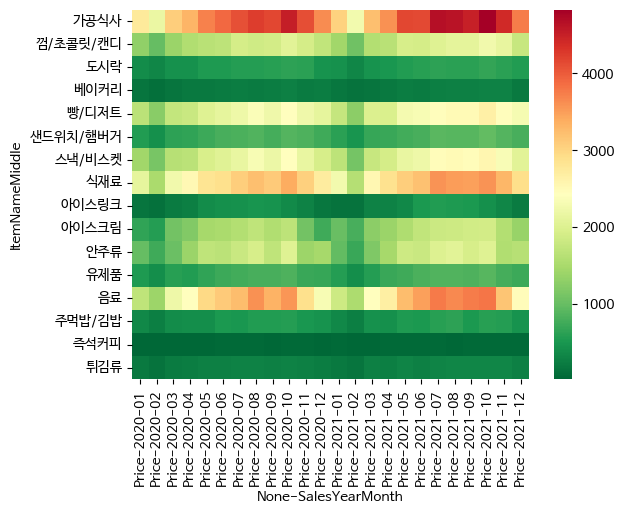

In [66]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['SalesYearMonth'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot,cmap='RdYlGn_r')
plt.show()

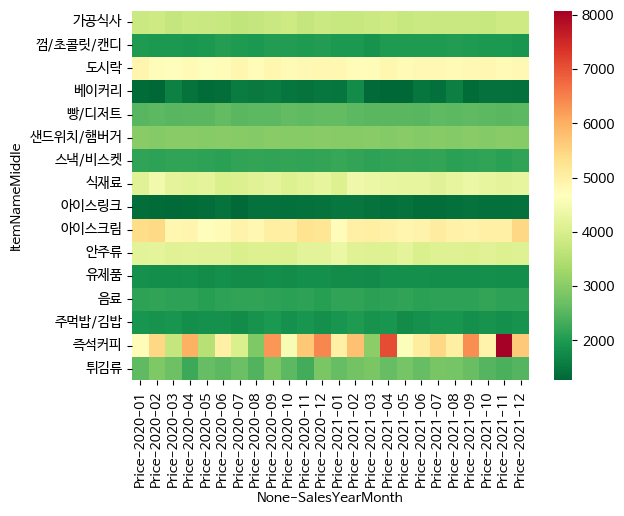

In [65]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['SalesYearMonth'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot,cmap='RdYlGn_r')
plt.show()

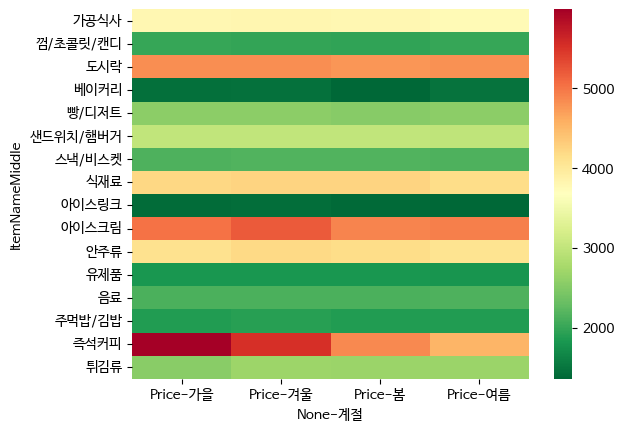

In [71]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['계절'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot,cmap='RdYlGn_r')
plt.show()

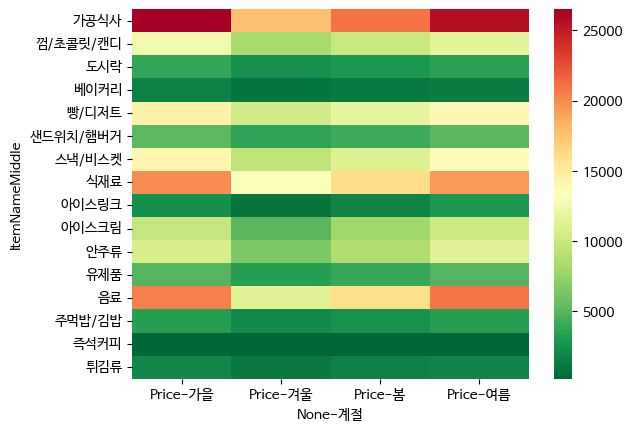

In [72]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['계절'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot,cmap='RdYlGn_r')
plt.show()

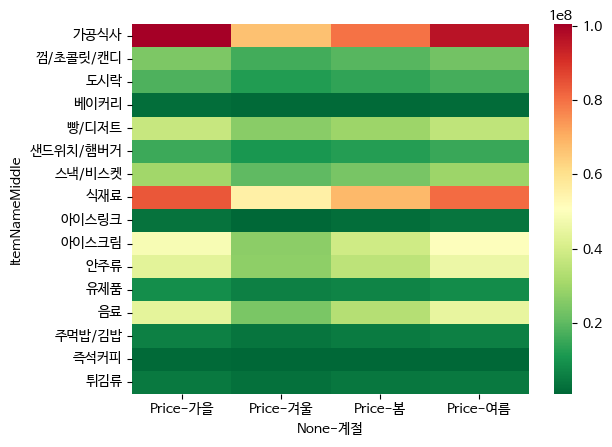

In [78]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=df['계절'].sort_values(ascending=True),values=['Price'],aggfunc='sum')
pivot
sns.heatmap(pivot,cmap='RdYlGn_r')
plt.show()

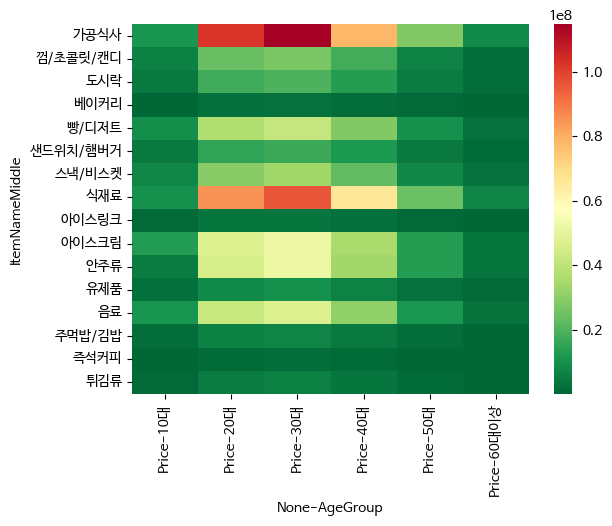

In [79]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=df['AgeGroup'].sort_values(ascending=True),values=['Price'],aggfunc='sum')
pivot
sns.heatmap(pivot,cmap='RdYlGn_r')
plt.show()

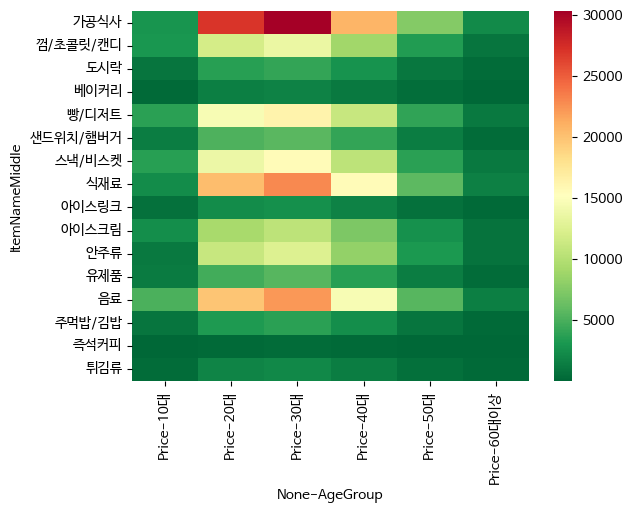

In [80]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=df['AgeGroup'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot,cmap='RdYlGn_r')
plt.show()

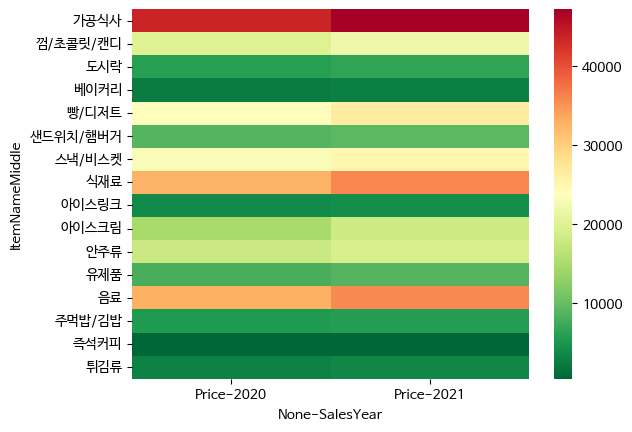

In [82]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=df['SalesYear'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot,cmap='RdYlGn_r')
plt.show()

In [94]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['SalesYear','Gender'],values=[df[df['SalesYear']=='2020']['Price']],margins=True,aggfunc='sum')
pivot

TypeError: unhashable type: 'Series'

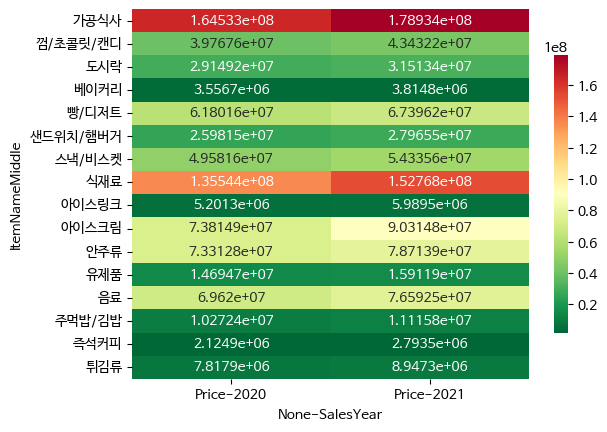

In [119]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=df['SalesYear'],values=['Price'],aggfunc='sum')
pivot
sns.heatmap(pivot,annot=True,fmt='g',cmap='RdYlGn_r',cbar_kws=dict(shrink=.75))
plt.show()

In [155]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=df['SalesYear'],values=['Price'],margins=True,aggfunc='sum')
pivot

/home/piai/anaconda3/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


TypeError: unhashable type: 'Series'

In [159]:
df.pivot_table(index=['ItemNameMiddle'],columns=df['SalesYear'],values=['Price'],margins=True,aggfunc='sum')


/home/piai/anaconda3/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


TypeError: unhashable type: 'Series'

In [134]:
pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 가공식사 to 튀김류
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   (Price, 2020)  16 non-null     int64
 1   (Price, 2021)  16 non-null     int64
dtypes: int64(2)
memory usage: 384.0+ bytes


SalesYear,2020,2021
ItemNameMiddle,,
가공식사,164533070,178933950
껌/초콜릿/캔디,39767550,43432250
도시락,29149200,31513400
베이커리,3556700,3814800
빵/디저트,61801650,67396250
샌드위치/햄버거,25981500,27965500
스낵/비스켓,49581600,54335600
식재료,135543920,152767940
아이스링크,5201300,5989500


In [149]:

pivot_diff=pivot['2021']-pivot['2020']

KeyError: '2021'

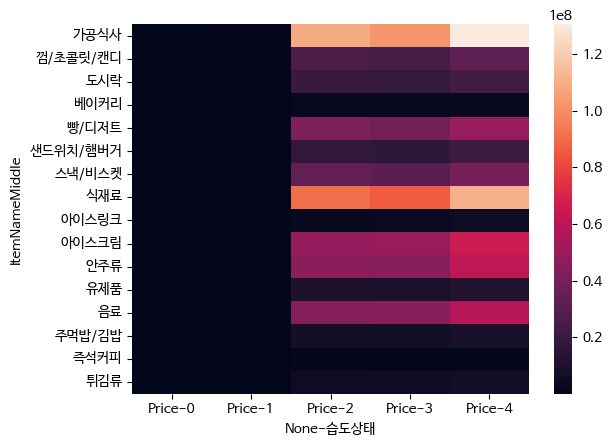

In [63]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['습도상태'],values=['Price'],aggfunc='sum')
pivot
sns.heatmap(pivot)
plt.show()

In [ ]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['습도상태'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

In [ ]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['습도상태'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

In [ ]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=df['SalesYear'],values=['Price'],aggfunc='sum')
pivot
sns.heatmap(pivot,cmap='RdYlGn_r')
plt.show()

In [174]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=df['SalesYear'],values=['Price'],normalize=True,aggfunc='sum')
pivot

TypeError: pivot_table() got an unexpected keyword argument 'normalize'

In [189]:
pd.crosstab(index=df['ItemNameMiddle'],columns=df['SalesYear'],values=df['Price'],aggfunc='sum')

SalesYear,2020,2021
ItemNameMiddle,,
가공식사,164533070,178933950
껌/초콜릿/캔디,39767550,43432250
도시락,29149200,31513400
베이커리,3556700,3814800
빵/디저트,61801650,67396250
샌드위치/햄버거,25981500,27965500
스낵/비스켓,49581600,54335600
식재료,135543920,152767940
아이스링크,5201300,5989500


In [191]:
pd.crosstab(df['ItemNameMiddle'],df['AgeGroup'],values=(df[df['Gender']=='남성']['Price']),aggfunc='sum').style.background_gradient()

AgeGroup,10대,20대,30대,40대,50대,60대이상
ItemNameMiddle,,,,,,
가공식사,8937390.000000,75614430.000000,78893760.000000,53207500.000000,20677650.000000,7439420.000000
껌/초콜릿/캔디,4381450.000000,17071350.000000,17955300.000000,11759400.000000,4662050.000000,1518450.000000
도시락,3118800.000000,12899800.000000,13619000.000000,9170200.000000,3586000.000000,1361700.000000
베이커리,288000.000000,1626600.000000,1598100.000000,1126700.000000,454700.000000,189700.000000
빵/디저트,6619580.000000,26652480.000000,27742290.000000,18856880.000000,7142580.000000,2428600.000000
샌드위치/햄버거,3091300.000000,11079000.000000,11768200.000000,8188000.000000,2988900.000000,984400.000000
스낵/비스켓,5456800.000000,21038000.000000,22327800.000000,14597700.000000,5409900.000000,2254400.000000
식재료,6285200.000000,62787670.000000,65994280.000000,45191040.000000,17652980.000000,6423750.000000
아이스링크,627200.000000,2537300.000000,2442900.000000,1560000.000000,662000.000000,207200.000000


In [192]:
pd.crosstab(df['ItemNameMiddle'],df['AgeGroup'],values=(df[df['Gender']=='여성']['Price']),aggfunc='sum').style.background_gradient()

AgeGroup,10대,20대,30대,40대,50대,60대이상
ItemNameMiddle,,,,,,
가공식사,2215480.000000,26691780.000000,35932590.000000,25239150.000000,7635190.000000,982680.000000
껌/초콜릿/캔디,1730700.000000,6678600.000000,8989850.000000,6196900.000000,2022350.000000,233400.000000
도시락,1149300.000000,4407000.000000,5834600.000000,3973900.000000,1393400.000000,148900.000000
베이커리,86300.000000,573500.000000,766900.000000,463400.000000,179900.000000,17700.000000
빵/디저트,2690180.000000,10349190.000000,13970500.000000,9354550.000000,3057580.000000,333490.000000
샌드위치/햄버거,1107300.000000,4187300.000000,5174800.000000,4010200.000000,1263100.000000,104500.000000
스낵/비스켓,2133400.000000,8451200.000000,11447900.000000,8077100.000000,2427000.000000,296000.000000
식재료,3771830.000000,22079050.000000,30034590.000000,20837810.000000,6549920.000000,703740.000000
아이스링크,226900.000000,832200.000000,1087600.000000,742200.000000,244200.000000,21100.000000


In [179]:
a=pd.crosstab(df['ItemNameMiddle'],df['AgeGroup'],values=(df[df['SalesYear']=='2021']['Price']),aggfunc='sum').style.background_gradient()

In [180]:
b= pd.crosstab(df['ItemNameMiddle'],df['AgeGroup'],values=(df[df['SalesYear']=='2020']['Price']),aggfunc='sum').style.background_gradient()

In [186]:
b= pd.crosstab(df['ItemNameMiddle'],df['AgeGroup'],values=(df[df['SalesYear']=='2020']['Price']),aggfunc='sum').style.background_gradient()
b

AgeGroup,10대,20대,30대,40대,50대,60대이상
ItemNameMiddle,,,,,,
가공식사,5299190.000000,48677270.000000,55898520.000000,37304100.000000,13319990.000000,4034000.000000
껌/초콜릿/캔디,2951750.000000,11236300.000000,13272350.000000,8474950.000000,3002650.000000,829550.000000
도시락,1909500.000000,8240300.000000,9574000.000000,6275700.000000,2395200.000000,754500.000000
베이커리,151400.000000,1070200.000000,1155500.000000,794100.000000,281800.000000,103700.000000
빵/디저트,4373290.000000,17602590.000000,20195970.000000,13666930.000000,4722580.000000,1240290.000000
샌드위치/햄버거,1939000.000000,7256800.000000,8188400.000000,5971800.000000,2107000.000000,518500.000000
스낵/비스켓,3588200.000000,14008800.000000,16371900.000000,10703400.000000,3683900.000000,1225400.000000
식재료,4743490.000000,39902990.000000,45401930.000000,31230820.000000,11189040.000000,3075650.000000
아이스링크,391400.000000,1540200.000000,1667400.000000,1075800.000000,422700.000000,103800.000000


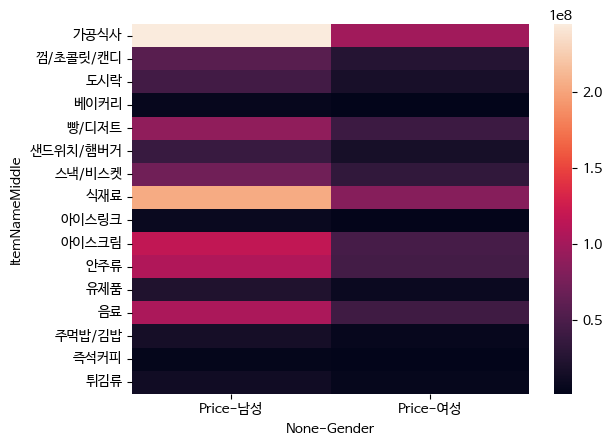

In [193]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['Gender'],values=['Price'],aggfunc='sum')
pivot
sns.heatmap(pivot)
plt.show()

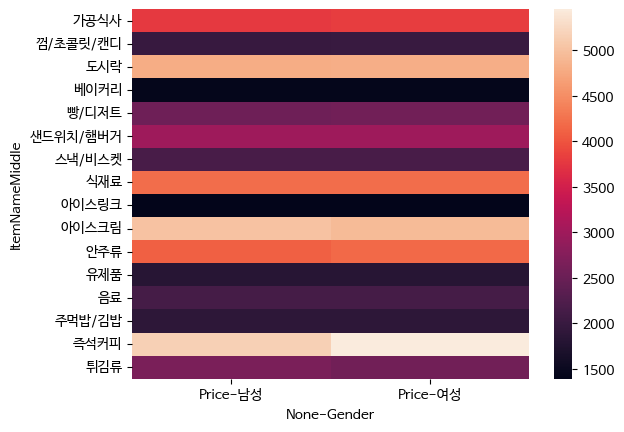

In [195]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['Gender'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot)
plt.show()

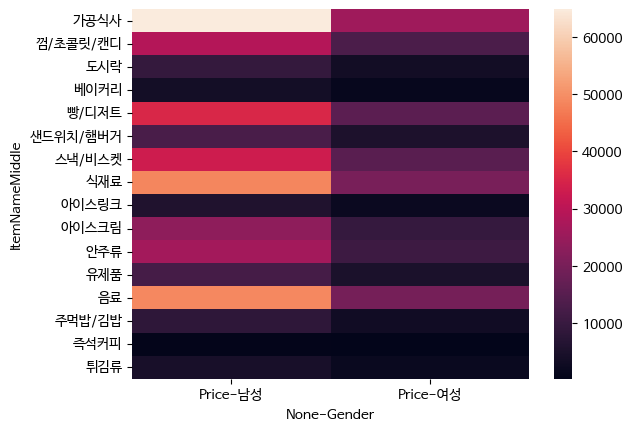

In [196]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['Gender'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot)
plt.show()

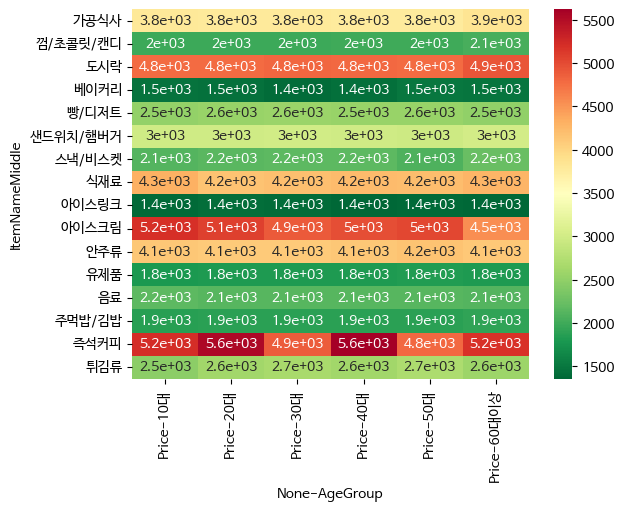

In [201]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['AgeGroup'],values=['Price'],aggfunc='mean')
pivot
sns.heatmap(pivot,cmap='RdYlGn_r',annot=True)
plt.show()

In [202]:
b= pd.crosstab(df['ItemNameMiddle'],df['AgeGroup'],values=(df[df['SalesYear']=='2020']['Price']),aggfunc='sum').style.background_gradient()
b

AgeGroup,10대,20대,30대,40대,50대,60대이상
ItemNameMiddle,,,,,,
가공식사,5299190.000000,48677270.000000,55898520.000000,37304100.000000,13319990.000000,4034000.000000
껌/초콜릿/캔디,2951750.000000,11236300.000000,13272350.000000,8474950.000000,3002650.000000,829550.000000
도시락,1909500.000000,8240300.000000,9574000.000000,6275700.000000,2395200.000000,754500.000000
베이커리,151400.000000,1070200.000000,1155500.000000,794100.000000,281800.000000,103700.000000
빵/디저트,4373290.000000,17602590.000000,20195970.000000,13666930.000000,4722580.000000,1240290.000000
샌드위치/햄버거,1939000.000000,7256800.000000,8188400.000000,5971800.000000,2107000.000000,518500.000000
스낵/비스켓,3588200.000000,14008800.000000,16371900.000000,10703400.000000,3683900.000000,1225400.000000
식재료,4743490.000000,39902990.000000,45401930.000000,31230820.000000,11189040.000000,3075650.000000
아이스링크,391400.000000,1540200.000000,1667400.000000,1075800.000000,422700.000000,103800.000000


In [215]:
b= pd.crosstab(df['강수상태'],df['ItemNameMiddle'],values=df['Price'],aggfunc='count',normalize=True,margins=True)
b*100

ItemNameMiddle,가공식사,껌/초콜릿/캔디,도시락,베이커리,빵/디저트,샌드위치/햄버거,스낵/비스켓,식재료,아이스링크,아이스크림,안주류,유제품,음료,주먹밥/김밥,즉석커피,튀김류,All
강수상태,,,,,,,,,,,,,,,,,
0,13.458572,6.206450,1.875296,0.766684,7.500796,2.695074,7.161764,10.197801,1.177345,4.793173,5.351340,2.504899,10.098756,1.687631,0.139590,0.955314,76.570485
1,1.076948,0.506424,0.159283,0.064872,0.610683,0.211992,0.571875,0.808387,0.088619,0.403132,0.419736,0.186506,0.812248,0.132060,0.010619,0.074911,6.138297
2,1.775092,0.817268,0.244041,0.096921,0.989487,0.349844,0.942764,1.314039,0.169902,0.678257,0.787728,0.339418,1.406327,0.220873,0.019307,0.122214,10.273485
3,0.481325,0.218749,0.063134,0.025099,0.272037,0.093639,0.252536,0.360270,0.044213,0.180714,0.229754,0.089585,0.367414,0.061590,0.004634,0.031857,2.776550
4,0.740619,0.333626,0.099045,0.037649,0.400429,0.137080,0.379191,0.560484,0.070857,0.293467,0.348686,0.136887,0.554306,0.094798,0.007144,0.046916,4.241184
All,17.532557,8.082518,2.440800,0.991225,9.773432,3.487629,9.308131,13.240981,1.550937,6.348744,7.137244,3.257296,13.239050,2.196951,0.181293,1.231212,100.000000
